In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

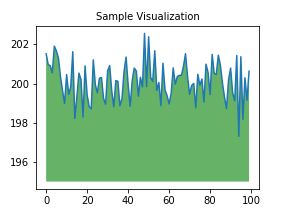

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

n =        100 | avg runtime =     569.60 ns | median runtime =     182.50 ns | (log2 log2 n)^2 =   7.463938
n =        300 | avg runtime =    1408.80 ns | median runtime =     976.00 ns | (log2 log2 n)^2 =   9.245767
n =        500 | avg runtime =    1122.90 ns | median runtime =    1023.50 ns | (log2 log2 n)^2 =  10.013616
n =       1000 | avg runtime =    1051.50 ns | median runtime =     992.00 ns | (log2 log2 n)^2 =  11.002379
n =       3000 | avg runtime =    1486.80 ns | median runtime =    1417.00 ns | (log2 log2 n)^2 =  12.460294
n =       5000 | avg runtime =    1778.90 ns | median runtime =    1737.00 ns | (log2 log2 n)^2 =  13.098207
n =      10000 | avg runtime =    2299.20 ns | median runtime =    2234.50 ns | (log2 log2 n)^2 =  13.927980
n =      30000 | avg runtime =    2264.50 ns | median runtime =    2209.00 ns | (log2 log2 n)^2 =  15.167849
n =      50000 | avg runtime =    2698.40 ns | median runtime =    2677.00 ns | (log2 log2 n)^2 =  15.716193
n =     100000 | av

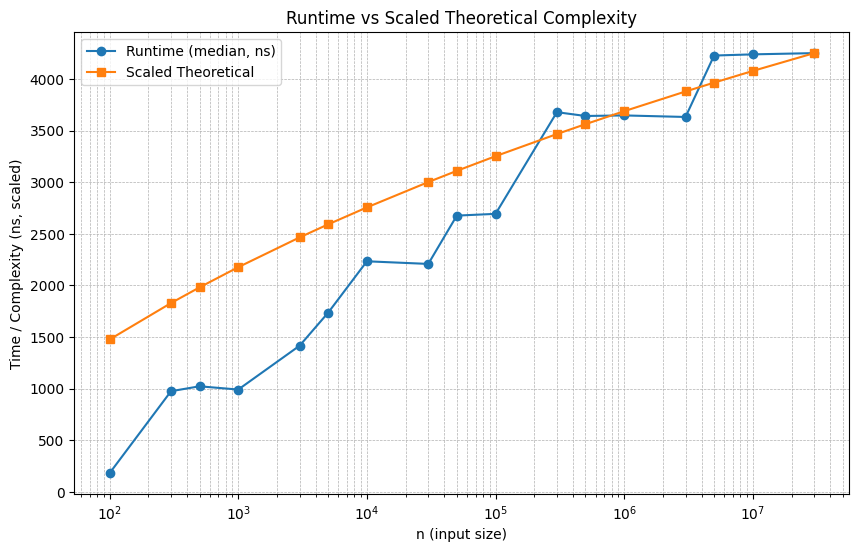

In [55]:
import time
import statistics
import matplotlib.pyplot as plt
import numpy as np
import math

def run_case(n: int) -> int:
    Sum = 0
    start = time.perf_counter_ns() #it is a clock to measure the time required by the code

    # Given Code
    j = 5.0
    ln_n = math.log(n)  # natural logarithm
    while j < ln_n:
        k = 5.0
        while k < n:
            Sum += 1.0  # placeholder for Sum += a[j] * b[k]
            k = k ** 1.5
        j = 1.2 * j

    end = time.perf_counter_ns()
    return end - start


def main():
    test_n = [
        100, 300, 500,
        1000, 3000, 5000,
        10000, 30000, 50000,
        100000, 300000, 500000,
        1000000, 3000000, 5000000,
        10000000, 30000000
    ]

    R = 10  # repetitions per n

    avg_times = []
    median_times = []
    theory_values = []

    # we will find the values of average and median runtimes for every input of n given
    for n in test_n:
        times = [run_case(n) for _ in range(R)]
        avg = statistics.mean(times)
        median = statistics.median(times)

        # Calculate the theoretical time complexity which is O(log logn)^2
        t_val = (np.log2(np.log2(n)))**2 if n > 4 else 0
        theory_values.append(t_val)

        avg_times.append(avg)
        median_times.append(median)

        print(f"n = {n:10d} | avg runtime = {avg:10.2f} ns | "f"median runtime = {median:10.2f} ns | "f"(log2 log2 n)^2 = {t_val:10.6f}")

    # we want to calculatet the scaling constant which we get when we divide the max of median runtime and theoretical values
    scale_factor = max(median_times) / max(theory_values)

    scaled_theory = [x * scale_factor for x in theory_values]

    print(f"\nScaling constant (max-to-max): {scale_factor:.6f}")

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(test_n, median_times, "o-", label="Runtime (median, ns)")
    plt.plot(test_n, scaled_theory, "s-", label="Scaled Theoretical")

    plt.xscale("log")
    plt.xlabel("n (input size)")
    plt.ylabel("Time / Complexity (ns, scaled)")
    plt.title("Runtime vs Scaled Theoretical Complexity")
    plt.legend()
    plt.grid(True, which="both", ls="--", lw=0.5)
    plt.show()


if __name__ == "__main__":
    main()